## 5.1
거래 데이터세트에 데이터마이닝 과정이 적용됨. 88개의 레코드들을 사기라고 분류 & 952개를 비사기라 분류. 정오행렬을 작성하고 전체적인 오차율 계산 

In [8]:
! pip install numpy
! pip install dmba

In [10]:
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt
from dmba import regressionSummary, classificationSummary 
from dmba import liftChart, gainsChart

In [11]:
import numpy as np
import pandas as pd #기본 자료구조 : Series, DataFrame

In [12]:
data = {'real_class_0': [30, 32], 'real_class_1':[58, 920]} 
df = pd.DataFrame(data) ##첫번째 열의 0과 1은 predict class
df ##정오행렬

,real_class_0,real_class_1
0,30,58
1,32,920


In [13]:
err = (58+32)/(df['real_class_0'].sum() +df['real_class_1'].sum()) ##sum을 이용해서 구한 것은 총 관측값의 합
err ##오차율

0.08653846153846154

## 5.2
사기라고 분류된 레코들의 비율을 변경할 수 있는 조정가능한 컷오프 매커니즘이 있음. 컷오프 값을 올리거나 내리면 어떤 효과?

In [14]:
## 임계값 = 컷오프

In [15]:
## 많은 경우에 하나의 클래스에 특히 관심을 갖기 때문에 특정 클래스에 초점을 두고 클래스에 속할 추정 확률값을 컷오프값과 비교함
## 클래스들을 통합하여 관심있는 클래스와 나머지 모든 클래스으 두개의 클래스로 병합하는 것이 합당

#### a
정말 사기인 레코드에 대한 분류 오차율

이럴경우에 컷오프값이 점점 커질수록 적은 레코드를 사기로 분류하며 오분류율은 감소한다.?

#### b
정말 비사기인 레코드에 대한 분류 오차율 

 컷오프값이 점점 작아질수록 적은 레코드를 비사기로 분류하며 오분류율은 감소한다.

## 5.3
이 회사는 기계학습과 데이터마이닝 기법들을 사용해 고객들을 위한 법안이 미국 의회와 주 의회를 통과할지 여부를 예측하고 있다 . 이 회사는 94%의 정확도를 보고한다. 

In [16]:
#미국 의회에서 제기된 법안만을 고려해 인터넷 조사를 해서 제기된 법안의 수와 통과율을 알아봐라.

In [17]:
#가능한 오분류의 유형을 규정하고 측도로서 전체적인 정확도를 사용하는 것에 대한 의견을 개진하시오.

In [18]:
#다른 가능한 측도들과 경향의 잠재적인 역할에 대한 논의를 포함하시오.

## 5.4 
새로운 데이터에 적용된 거래 데이터 모델에 대한 십분위 향상차트

#### a

In [19]:
# y축 상의 막대기들은 한 번에 십분위 하나씩 취하면서 우리 모델이 0과 1을 임의로 배정하는 것보다 잘하는 정도를 보여준다.

경향이 가장 커서 가장 1이 될 가능성이 높다고 랭크된 레코드들의 10%를 취하면 10%의 레코드들을 임의로 선택하는 것보다
6배 많은 1을 얻을 수 있음을 알 수 있다. 또한 상위 20%의 레코드들을 이 모델을 사용하여 선택해도 여전히 임의로 하는 것보다 3배 좋은 성능을 냄을 시사한다.

#### b

무작위로 사람을 고르지 않고 첫번째 막대나 두번째 막대와 같이 응답률이 높은 사람들 중에서 택한다면 더 좋은 성능을 보인다.

#### c

모든 것을 비사기로 분류한다면 오차율은 감소하고 결과적으로 모델의 정확도는 커져서 개선할 수 있다고 말할 수 있다.

#### d

십분위 차트를 통해 확인해보면 상위레코드들의 향상정도가 뚜렷하기 때문에 해당 모델 성능을 보여주기에 적합하다. a번에서 오차율에 관해 서술하고 있고 실제 데이터에 맞게 구분하는지 나타나기 때문에 모델 성능을 보여주기에 적합하다고 볼 수 있다.

## 5.5

#### a

In [57]:
data2 = {'0': [270, 130], '1':[90, 310]} #0은 비사기
df2 = pd.DataFrame(data2) 
df2 ##정오행렬

,0,1
0,270,90
1,130,310


In [58]:
err=220/800 #오분류율
err

0.275

#### b

In [51]:
k=round(50/99,4)

In [59]:
data2 = {'0': [round(270/k,4), round(130/k,4)], '1':[90/50, 310/50]} 
df2 = pd.DataFrame(data2) 
df2 ##정오행렬

,0,1
0,534.5476,1.8
1,257.3748,6.2


In [60]:
round(df2['0'].sum()+df2['1'].sum())

800

In [61]:
err2=(round(130/k,4)+1.8)/800 #오분류율
err2

0.3239685

#### c

In [62]:
(257.3748+6.2)/800

0.3294685

## 5.6

#### a

In [1]:
## 평균 * 총 사람 수 = 전체 수익 
2500*1000

2500000

#### b

십분위 차트를 통해 상위 10%에 해당된는 것을 진행해야 한다.

#### c

컷오프값이 낮아지면 오차율은 커진다. 따라서 상위 10%에 해당되는 것을 진행해야한다.

d

올바른 분류와 잘못된 분류의 이득과 비용이 알려져 있거나 추정될 수 있을때, 향상차트는 유용한 시각화와 결정도구이기 때문이다.




## 5.7

#### a

In [69]:
data4 = {'real':[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        'p':[0.03, 0.52, 0.38, 0.85, 0.33, 0.42, 0.55, 0.29, 0.09, 0.21, 0.43, 0.04, 0.08, 0.13, 0.01, 0.79, 0.42, 0.29, 0.08, 0.02],} 
df4 = pd.DataFrame(data4) ##첫번째 열의 0과 1은 predict class
df4 ##정오행렬

,real,p
0,0,0.03
1,0,0.52
2,0,0.38
3,1,0.85
4,0,0.33
5,0,0.42
6,1,0.55
7,0,0.29
8,0,0.09
9,0,0.21


In [70]:
## cut off = 0.25
predicted = [1 if p > 0.25 else 0 for p in df4.p]
classificationSummary(df4.real, predicted, class_names=['zero', 'one'])

Confusion Matrix (Accuracy 0.6000)

       Prediction
Actual zero  one
  zero    9    8
   one    0    3


In [71]:
err=8/20
sensi=9/17
spec=3/3
print("cut off=0.25일때, \n오차율: ", err, "\n민감도: ", sensi,"\n특이도: ", spec)

cut off=0.25일때, 
오차율:  0.4 
민감도:  0.5294117647058824 
특이도:  1.0


In [72]:
## cut off = 0.5
predicted = [1 if p > 0.5 else 0 for p in df4.p]
classificationSummary(df4.real, predicted, class_names=['zero', 'one'])

Confusion Matrix (Accuracy 0.9500)

       Prediction
Actual zero  one
  zero   16    1
   one    0    3


In [73]:
err=1/20
sensi=16/17
spec=3/3
print("cut off=0.5일때, \n오차율: ", err, "\n민감도: ", sensi,"\n특이도: ", spec)

cut off=0.5일때, 
오차율:  0.05 
민감도:  0.9411764705882353 
특이도:  1.0


In [74]:
## cut off = 0.75
predicted = [1 if p > 0.75 else 0 for p in df4.p]
classificationSummary(df4.real, predicted, class_names=['zero', 'one'])

Confusion Matrix (Accuracy 0.9500)

       Prediction
Actual zero  one
  zero   17    0
   one    1    2


In [75]:
err=1/20
sensi=17/17
spec=2/3
print("cut off=0.5일때, \n오차율: ", err, "\n민감도: ", sensi,"\n특이도: ", spec)

cut off=0.5일때, 
오차율:  0.05 
민감도:  1.0 
특이도:  0.6666666666666666


#### b

<AxesSubplot:title={'center':'Decile Lift Chart'}, xlabel='Percentile', ylabel='Lift'>

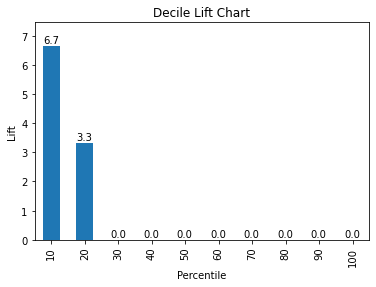

In [76]:
df4=df4.sort_values(by=['p'], ascending=False)
liftChart(df4.real)